In [2]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.optim as optim
import imageio


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [3]:
import matplotlib
%matplotlib qt5

from pylab import show, ginput, rand, imshow, plot, imread
from matplotlib.figure import Figure
import numpy as np

from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import skimage.io as skio
import os
from pylab import plot, ginput, show, axis
from scipy.spatial import Delaunay
from skimage.draw import polygon

## Helper functions

In [4]:
INPUT_PATH = "./data/"
OUTPUT_PATH = "output/"

import skimage.io as skio

%matplotlib inline
def display_image(image, display=True, addIntDisplay=False):
    if display and addIntDisplay:
        display_image_with_int(image)
    if display:
        imshow(image)
        plt.show()

def display_image_with_int(image):
    imshow(image.astype(np.uint8))
    plt.show()

def display_coords(im, points):
    x = points[1]
    y = points[0]
    plt.imshow(im.astype(np.uint8))
    plt.scatter(x,y,s=10,c='b')
    plt.draw()
    plt.show()

def display_points(im, points):
    x = []
    y = []
    for p in points:
        x.append(p[0])
        y.append(p[1])
    
    plt.imshow(im.astype(np.uint8))
    plt.scatter(x,y,s=10,c='r')
    plt.draw()
    plt.show()
    
def read_image(im_name, depth=True, display=False, addIntDisplay=False, saveAs='', input_path=INPUT_PATH):
    if depth:
        im = skio.imread(input_path + im_name)/1.
    else:
        im = skio.imread(input_path + im_name, 2)/1.
    display_image(im, display, addIntDisplay)
    save_image(im, saveAs)
    return im 

def save_image(image, file_to='', output_path="output/"):
    if file_to:
        imageio.imwrite(output_path + file_to, image)


def pick_points(image, addIntDisplay=False, already_saved_at='', saveAs='', num_pts=58):
    if already_saved_at and os.path.isfile("data/" + already_saved_at): 
        return np.loadtxt("data/" + already_saved_at) 
    else:
        if(addIntDisplay):
            imshow(image.astype(np.uint8))
        else:
            imshow(image)
        pts = np.array(ginput(num_pts, timeout=600))
        if already_saved_at: 
            np.savetxt("data/" + already_saved_at, pts)
        elif saveAs: 
            np.savetxt("data/" + saveAs, pts)
        return pts

##Taken from stackoverflow post
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray


## Depth Refocusing

In [15]:
import glob

def load_images(root_dir, folder_name, image_type):
    all_images = []
    filenames = glob.glob(root_dir + folder_name + "*" + image_type)
    for filename in filenames:
        all_images.append(plt.imread(filename))
    return all_images, filenames

In [16]:
jellybeans, jellyfilenames = load_images('data/', "jellybeans/", ".png")


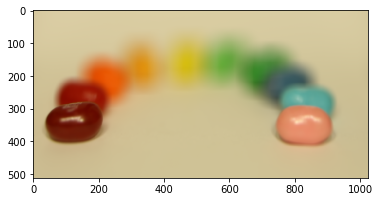

In [29]:
avg = np.mean(jellybeans, axis=0)
save_image(avg, "jb_original_avg.png")
imshow(avg)
plt.show()

In [20]:
# Changes the focus of the image by shifting the array 
def shift_images(all_images, alpha, size):
    all_shifted = []
    val = int(np.sqrt(size))
    grid = np.arange(size).reshape((val, val))
    middle = (np.floor(grid.shape[0]/2.), np.floor(grid.shape[0]/2.))
    grid = np.flipud(grid)
    
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            curr = all_images[grid[i][j]]
            horiz_change = int(i - middle[0]) * -1
            vert_change = int(j - middle[1]) * -1
            shift_image = np.roll(curr, int(horiz_change * alpha), axis=0)
            shift_image = np.roll(shift_image, int(vert_change * alpha), axis=1)
            all_shifted.append(shift_image)
    
    return all_shifted

Refocusing image with alpha of -6


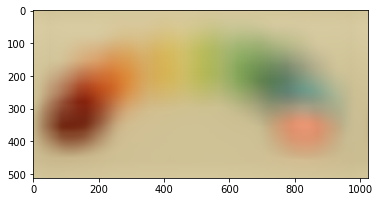

Refocusing image with alpha of -5


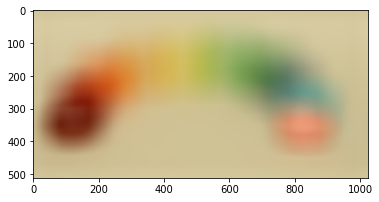

Refocusing image with alpha of -4


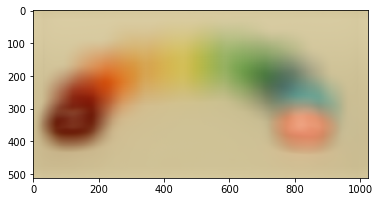

Refocusing image with alpha of -3


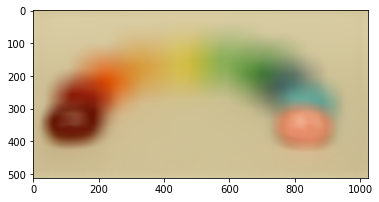

Refocusing image with alpha of -2


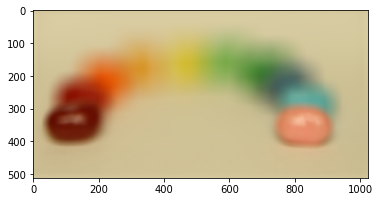

Refocusing image with alpha of -1


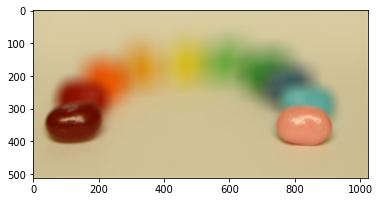

Refocusing image with alpha of 0


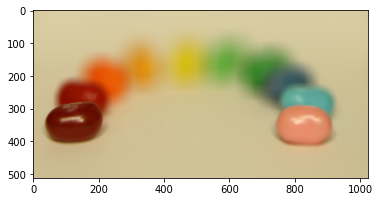

Refocusing image with alpha of 1


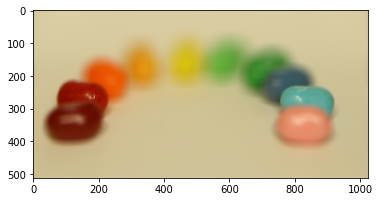

Refocusing image with alpha of 2


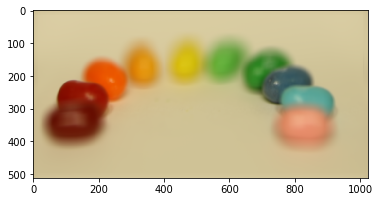

Refocusing image with alpha of 3


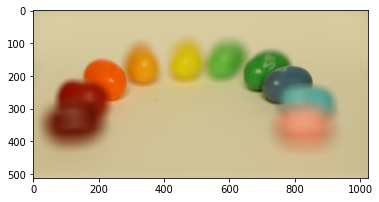

Refocusing image with alpha of 4


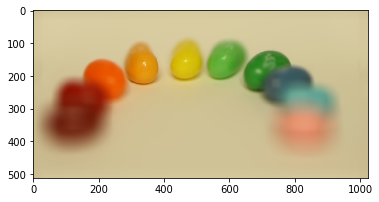

Refocusing image with alpha of 5


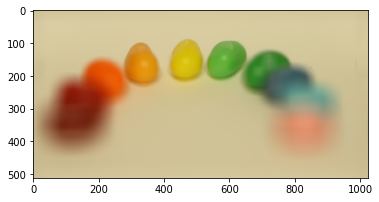

Refocusing image with alpha of 6


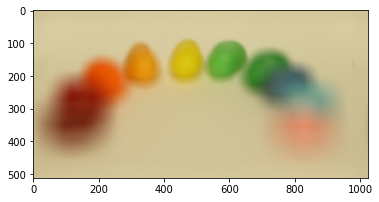

In [21]:

source_dir = 'data/'
folder = "jellybeans/" 
dest_dir = 'output/'
image_type = '.png'
step = 1
aperture_radius = 2


all_depths = [-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6]

for alpha in all_depths:
    print ("Refocusing image with alpha of " + str(alpha))
    refocused_imgs = shift_images(jellybeans, alpha, 289)
    avg_refocused = np.mean(refocused_imgs, axis = 0)

    imshow(avg_refocused)
    plt.show()

    save_image(avg_refocused, "jb_refocused_" + str(alpha) + ".png")

    

## Aperture Adjustment

In [22]:
def aperture(all_images, radius):
    # Produces an images with aperture radius surrounding the center image
    print(radius)
    if(radius < 0):
        return
    
    grid = np.arange(289).reshape((17, 17))
    middle = (np.floor(grid.shape[0]/2.), np.ceil(grid.shape[0]/2.))
    x = int(middle[0] - radius)
    y = int(middle[1] + radius)
    
    images = np.array(grid[x: y, x: y]).flatten()
    
    altered = np.mean([all_images[val] for val in images], axis=0)
    
    return altered


0


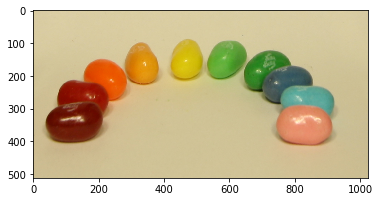

1


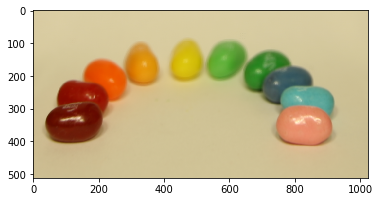

2


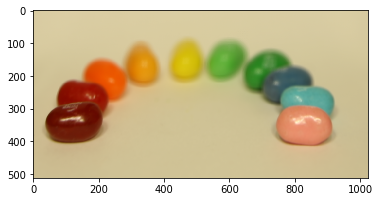

3


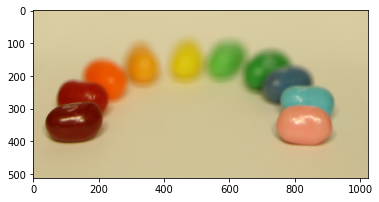

4


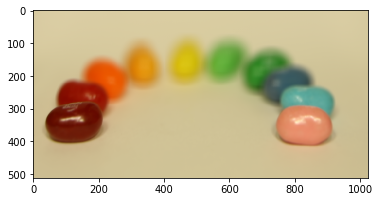

5


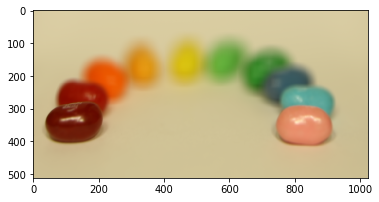

6


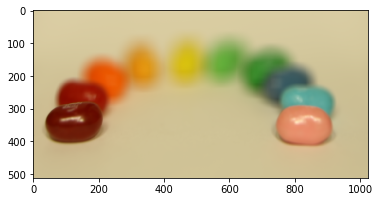

7


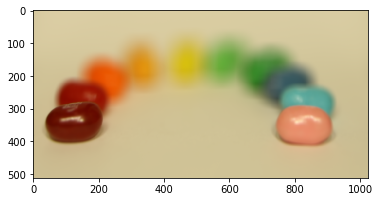

0


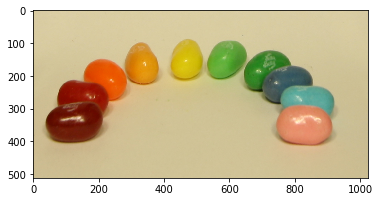

In [24]:

for radius in range(0, 9):
    altered = aperture(jellybeans, radius%8)
    imshow(altered)
    plt.show()
    save_image(altered, "jb_aperature_" + str(radius) + ".png")
    

## Bells and Whistles

In [25]:
rocks, rockfilenames = load_images('data/', "rocks/", ".jpg")


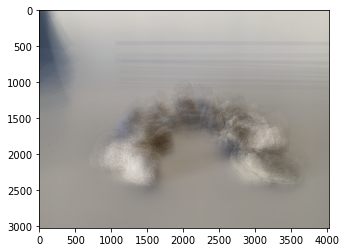

In [26]:
rocks_avg = np.mean(rocks, axis=0)
imshow(rocks_avg.astype(np.uint8))
plt.show()


Refocusing image with alpha of -6


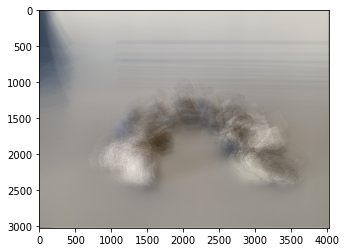

Refocusing image with alpha of -5


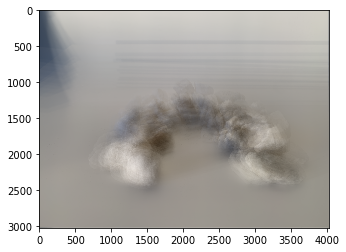

Refocusing image with alpha of -4


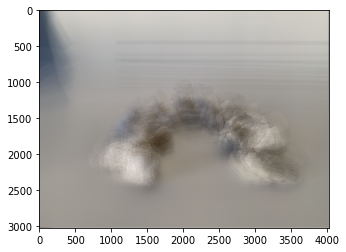

Refocusing image with alpha of -3


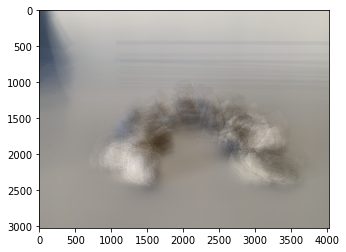

Refocusing image with alpha of -2


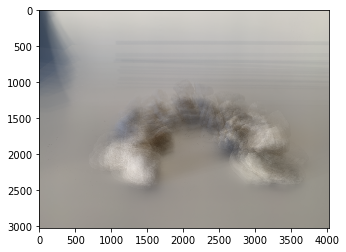

Refocusing image with alpha of -1


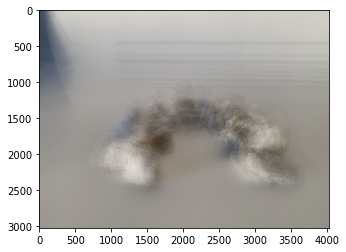

Refocusing image with alpha of 0


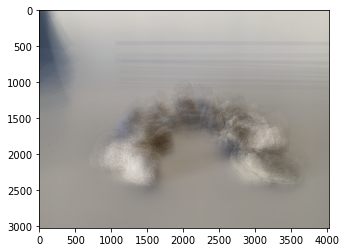

Refocusing image with alpha of 1


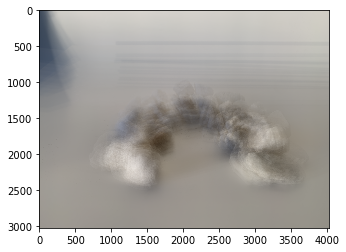

Refocusing image with alpha of 2


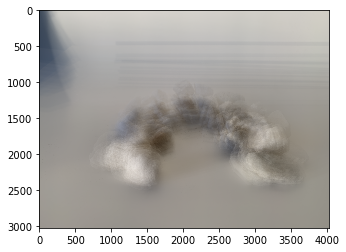

Refocusing image with alpha of 3


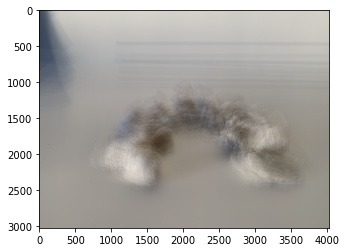

Refocusing image with alpha of 4


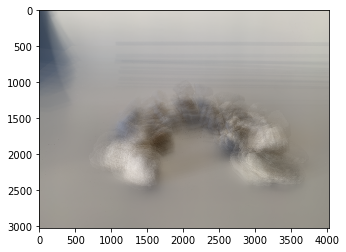

Refocusing image with alpha of 5


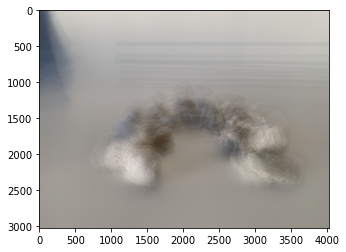

Refocusing image with alpha of 6


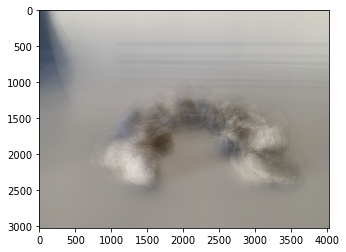

In [28]:

folder = "rocks/" 
image_type = '.jpg'
step = 1

all_depths = [-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6]

for alpha in all_depths:
    print ("Refocusing image with alpha of " + str(alpha))
    refocused_rocks = shift_images(rocks, alpha, 16)
    avg_refocused = np.mean(refocused_rocks, axis = 0)

    imshow(avg_refocused.astype(np.uint8))
    plt.show()

    save_image(avg_refocused, "rock_refocused_" + str(alpha) + ".png")

    